# import

In [1]:
import pandas as pd
import numpy as np

/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
import pdb

In [4]:
from IPython import display

thực ra cnn là một kĩ thuật trích xuất đặc trưng chứ không phải là một thuật toán phân loại.

# tích chập 1 chiều

excel file

# tích chập 2 chiều

excel file

## read image

In [5]:
img=mpimg.imread('cat.jpg')

In [6]:
img = np.mean(img,axis = 2)

In [7]:
img.shape

(108, 192)

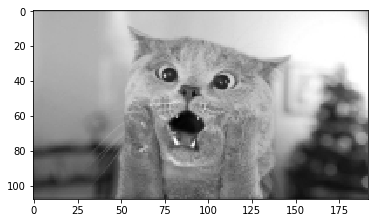

In [8]:
plt.imshow(img, cmap='gray')

## plot funct

In [9]:
def plot_image(img = None, disable_tick = True, text = None, title = None):        
    if img is not None: 
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(np.array([[0]]), cmap='gray')                
        plt.text(0, 0, str(round(text, 2)),  color='white', fontsize=50)
    if disable_tick: plt.xticks([]); plt.yticks([])
    if title is not None: plt.title(title)

In [12]:
def convo_interac(origin, W, res, A_res):
    fig = plt.figure(figsize=(15,15))
    
    #fig.add_subplot(1, 4, 1)
    ax1 = plt.subplot2grid((2,3), (0,0))    
    plot_image(img = origin,title = 'original matrix')

    ax1 = plt.subplot2grid((2,3), (0,1))
    plot_image(img = W,title = 'filter')

    ax1 = plt.subplot2grid((2,3), (0,2))
    plot_image(text= res,title = 'transformed')

    ax1 = plt.subplot2grid((2,3), (1,0), colspan=3)
    plot_image(img= A_res,title = 'result image')

    plt.show()
    display.clear_output(wait=True)

In [11]:
def convo_result(A, W, A_res):
    fig = plt.figure(figsize=(25,25))
    
    fig.add_subplot(1, 3, 1)
    plot_image(img = A, title = 'original image')
    
    fig.add_subplot(1, 3, 2)
    plot_image(img = W, title = 'filter')

    fig.add_subplot(1, 3, 3)
    plot_image(img = A_res, title = 'transformed image')
    
    plt.show()

 ## convo

In [15]:
def conv2d_11(A, W, stride = 1, pad = 0, interactive = False, steps = 20):
    """
    A: input, A.shape = (n_H_old, n_W_old)
    W: filter, W.shape = (f, f)
    """
    n_H_old, n_W_old = A.shape[:2]
    f, f = W.shape
    A_pad = np.pad(A, pad_width=pad, mode = 'constant', constant_values = 0)
    # new shape 
    n_H_new = int((n_H_old - f + 2*pad)/stride) + 1 
    n_W_new = int((n_W_old - f + 2*pad)/stride) + 1 
    # result
    A_res = np.zeros((n_H_new, n_W_new))
    # compute
    i = 0
    for h in range(n_H_new):
        for v in range(n_W_new):
            
            h_start = h*stride 
            h_end = h_start + f
            v_start = v*stride 
            v_end = v_start + f
            
            origin = A_pad[h_start:h_end, v_start:v_end]
            res = np.sum(A_pad[h_start:h_end, v_start:v_end] * W)
            A_res[h, v] = res
            
            i += 1
            if interactive and i<steps: convo_interac(origin, W, res, A_res)

    return A_res

In [16]:
def do(A,  W, stride = 1, pad = 0, debug = False, interactive = False):    
    if debug: pdb.set_trace()
    A_res = conv2d_11(A, W, stride = stride, pad = pad, interactive = interactive)
    convo_result(A, W, A_res)

## lọc cạnh ngang

In [17]:
W = np.array([[1,1,1],
              [0,0,0],
              [-1,-1,-1]])

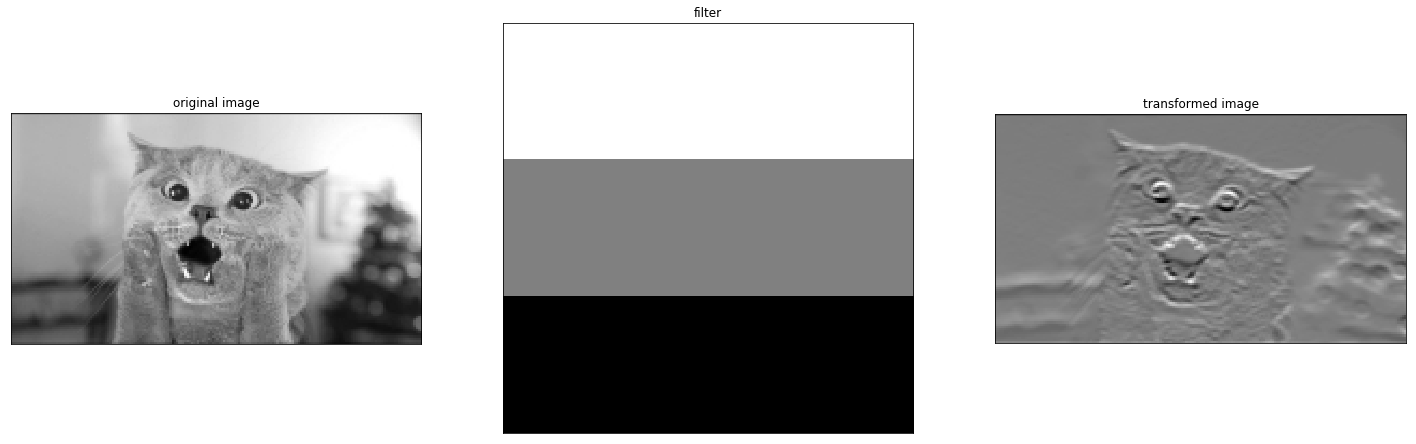

In [18]:
do(img, W)

## lọc cạnh dọc

In [19]:
W = np.array([[-1,0,1],
              [-1,0,1],
              [-1,0,1]])

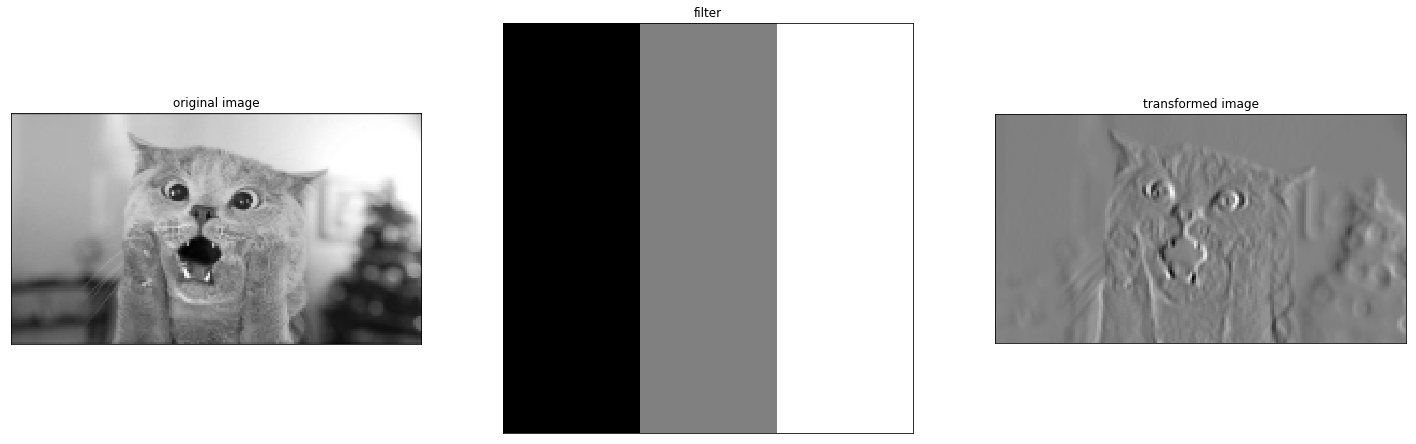

In [20]:
do(img, W)

## debug

> <ipython-input-16-ab6b72ea97b7>(3)do()
-> A_res = conv2d_11(A, W, stride = stride, pad = pad, interactive = interactive)
(Pdb) ll
  1  	def do(A,  W, stride = 1, pad = 0, debug = False, interactive = False):
  2  	    if debug: pdb.set_trace()
  3  ->	    A_res = conv2d_11(A, W, stride = stride, pad = pad, interactive = interactive)
  4  	    convo_result(A, W, A_res)
(Pdb) s
--Call--
> <ipython-input-15-738a48889179>(1)conv2d_11()
-> def conv2d_11(A, W, stride = 1, pad = 0, interactive = False, steps = 20):
(Pdb) ll
  1  ->	def conv2d_11(A, W, stride = 1, pad = 0, interactive = False, steps = 20):
  2  	    """
  3  	    A: input, A.shape = (n_H_old, n_W_old)
  4  	    W: filter, W.shape = (f, f)
  5  	    """
  6  	    n_H_old, n_W_old = A.shape[:2]
  7  	    f, f = W.shape
  8  	    A_pad = np.pad(A, pad_width=pad, mode = 'constant', constant_values = 0)
  9  	    # new shape
 10  	    n_H_new = int((n_H_old - f + 2*pad)/stride) + 1
 11  	    n_W_new = int((n_W_old - f + 2*pad)/st

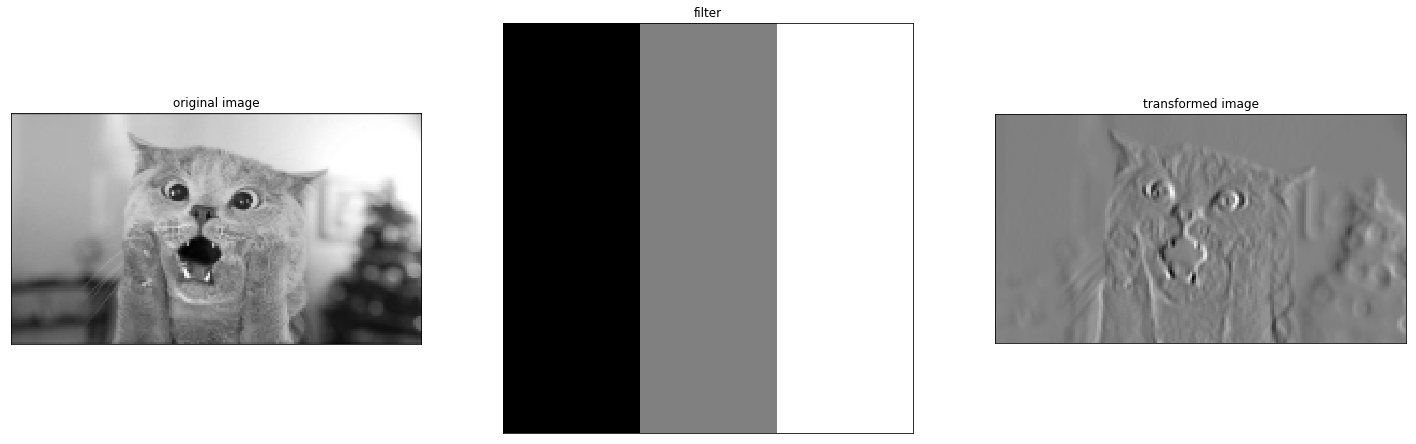

In [21]:
do(img, W, debug=True)

## visual

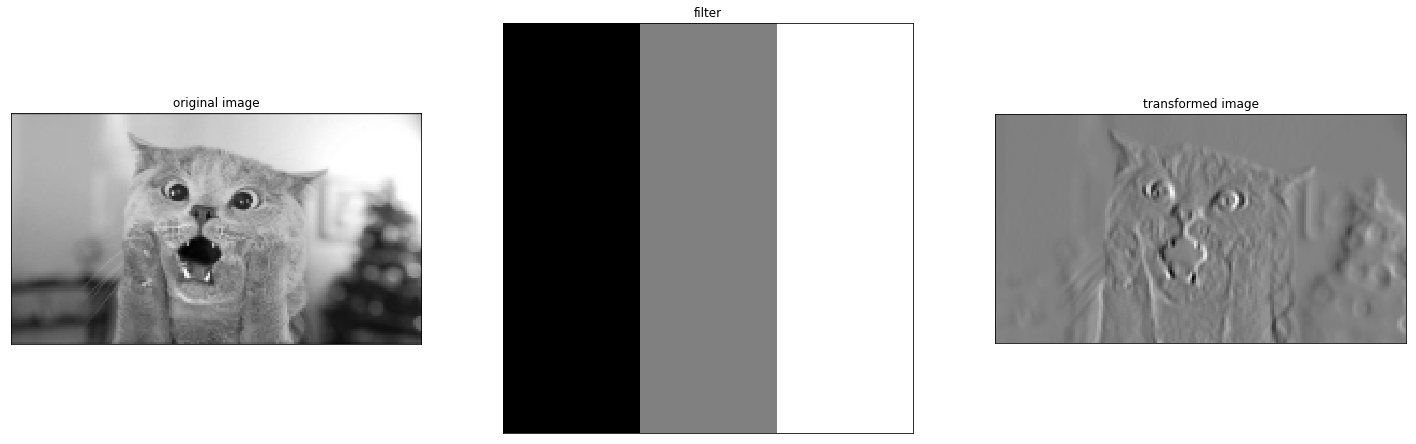

In [23]:
do(img, W, interactive=True)

# kết hợp các mạng tích chập để ra được các đặc trưng của vật thể

https://arxiv.org/abs/1311.2901

![title](cnn_layer1.jpeg)

![title](cnn_layer2.jpeg)

![title](cnn_layer3.png)

![title](cnn_layer4.jpeg)

# practice

change filter size and value